## Seleção de Patch de Maneira Dinâmica

In [78]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision import transforms

d:\AREA_DE_TRABALHO\Faculdade_7_Periodo\TCC1\VIT-cric\vit-dynamic-patches\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


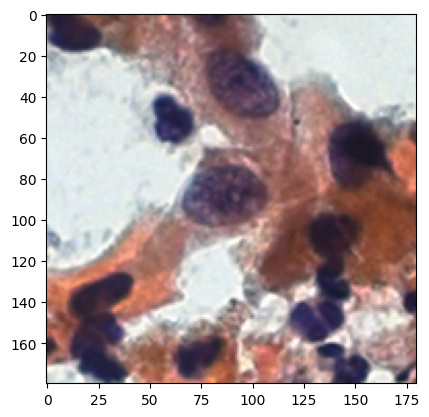

In [8]:
path_image = "../data/base_recortada/ASC-H/10.png"
im = Image.open(path_image)
imagem_rgb = im.convert('RGB')
plt.imshow(imagem_rgb)
plt.show()

In [9]:
im.size

(180, 180)

### Normal Pixels

196
[(8, 8), (8, 24), (8, 40), (8, 56), (8, 72), (8, 88), (8, 104), (8, 120), (8, 136), (8, 152), (8, 168), (8, 184), (8, 200), (8, 216), (24, 8), (24, 24), (24, 40), (24, 56), (24, 72), (24, 88), (24, 104), (24, 120), (24, 136), (24, 152), (24, 168), (24, 184), (24, 200), (24, 216), (40, 8), (40, 24), (40, 40), (40, 56), (40, 72), (40, 88), (40, 104), (40, 120), (40, 136), (40, 152), (40, 168), (40, 184), (40, 200), (40, 216), (56, 8), (56, 24), (56, 40), (56, 56), (56, 72), (56, 88), (56, 104), (56, 120), (56, 136), (56, 152), (56, 168), (56, 184), (56, 200), (56, 216), (72, 8), (72, 24), (72, 40), (72, 56), (72, 72), (72, 88), (72, 104), (72, 120), (72, 136), (72, 152), (72, 168), (72, 184), (72, 200), (72, 216), (88, 8), (88, 24), (88, 40), (88, 56), (88, 72), (88, 88), (88, 104), (88, 120), (88, 136), (88, 152), (88, 168), (88, 184), (88, 200), (88, 216), (104, 8), (104, 24), (104, 40), (104, 56), (104, 72), (104, 88), (104, 104), (104, 120), (104, 136), (104, 152), (104, 168), (1

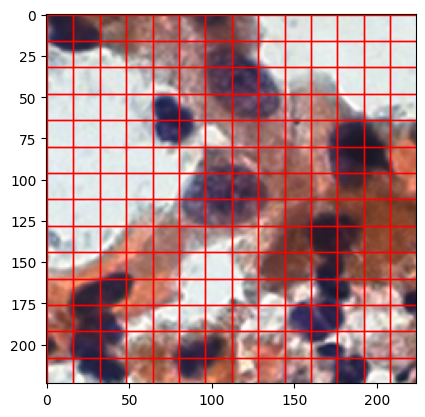

In [127]:
def resize_image(image, target_size):
    return image.resize(target_size)

def generate_patch_centers(image_height, image_width, patch_size):
    stride = patch_size  
    
    num_patches_h = image_height // stride
    num_patches_w = image_width // stride
    
    centers_h = [(i * stride + stride // 2) for i in range(num_patches_h)]
    centers_w = [(j * stride + stride // 2) for j in range(num_patches_w)]
    
    centers = [(h, w) for h in centers_h for w in centers_w]
    return centers

def visualize_patch_centers(image, centers, patch_size):
    fig, ax = plt.subplots(1)
    
    image_np = np.array(image)
    
    if image_np.max() > 1:
        image_np = image_np / 255.0
    
    ax.imshow(image_np)
    
    patch_height, patch_width = patch_size
    
    for (h, w) in centers:
        rect = patches.Rectangle(
            (w - patch_width // 2, h - patch_height // 2), 
            patch_width, patch_height,
            linewidth=1, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
    
    plt.show()
    
resized_image = resize_image(im, (224, 224))
patch_size = 16
centers = generate_patch_centers(224, 224, patch_size)
print(len(centers))
print(centers)
visualize_patch_centers(resized_image, centers, (patch_size, patch_size))

-----

### Random Pixels

In [123]:
def generate_random_patch_centers(image_height, image_width, patch_size, num_patches):
    patch_height, patch_width = patch_size
    
    centers = []
    for _ in range(num_patches):
        h = random.uniform(patch_height / 2, image_height - patch_height / 2)
        w = random.uniform(patch_width / 2, image_width - patch_width / 2)
        centers.append((h, w))

    return centers

196


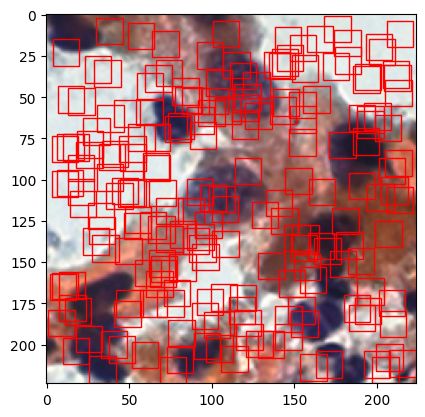

In [128]:
image_height = 224
image_width = 224
patch_size = (16, 16)
num_patches = 196
resized_image = resize_image(im, (224, 224))

patch_centers = generate_random_patch_centers(image_height, image_width, patch_size, num_patches)

print(len(patch_centers))
visualize_patch_centers(resized_image, patch_centers, (16, 16))